In [2]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
   
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn
import pandas as pd

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb

from tigramite.models import LinearMediation, Prediction

from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process.kernels import RBF

In [3]:
#lettura csv building 1

electricity_data = pd.read_csv("citylearn_challenge_2023_phase_1/Building_1.csv")
print(electricity_data)

     month  hour  day_type  daylight_savings_status  \
0        6     1         5                        0   
1        6     2         5                        0   
2        6     3         5                        0   
3        6     4         5                        0   
4        6     5         5                        0   
..     ...   ...       ...                      ...   
715      6    20         6                        0   
716      6    21         6                        0   
717      6    22         6                        0   
718      6    23         6                        0   
719      6    24         6                        0   

     indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                      23.098652                                  -0.123570   
1                      22.234743                                   0.012520   
2                      22.223060                                   0.000838   
3                      

In [4]:
#lettura csv carbon_intensity
weather_data = pd.read_csv("citylearn_challenge_2023_phase_1/weather.csv")
print(weather_data)

     outdoor_dry_bulb_temperature  outdoor_relative_humidity  \
0                           24.66                      77.56   
1                           24.07                      85.12   
2                           23.90                      89.62   
3                           23.87                      91.88   
4                           23.83                      93.06   
..                            ...                        ...   
715                         31.98                      43.75   
716                         29.92                      51.62   
717                         28.48                      59.12   
718                         27.27                      66.56   
719                         26.26                      73.75   

     diffuse_solar_irradiance  direct_solar_irradiance  \
0                        0.00                     0.00   
1                        0.00                     0.00   
2                        0.00                     0.00   

In [5]:
#aggiunta del campo carbon_intensity coi relativi valori nel dataset dell'elettricità
electricity_data['outdoor_dry_bulb_temperature'] = weather_data['outdoor_dry_bulb_temperature']
electricity_data['outdoor_relative_humidity'] = weather_data['outdoor_relative_humidity']
print(electricity_data)

     month  hour  day_type  daylight_savings_status  \
0        6     1         5                        0   
1        6     2         5                        0   
2        6     3         5                        0   
3        6     4         5                        0   
4        6     5         5                        0   
..     ...   ...       ...                      ...   
715      6    20         6                        0   
716      6    21         6                        0   
717      6    22         6                        0   
718      6    23         6                        0   
719      6    24         6                        0   

     indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                      23.098652                                  -0.123570   
1                      22.234743                                   0.012520   
2                      22.223060                                   0.000838   
3                      

In [6]:
columns_of_interest = ['indoor_dry_bulb_temperature','indoor_relative_humidity','indoor_dry_bulb_temperature_set_point','outdoor_dry_bulb_temperature','outdoor_relative_humidity']
electricity_data = electricity_data[columns_of_interest]

print(electricity_data)

     indoor_dry_bulb_temperature  indoor_relative_humidity  \
0                      23.098652                 61.086185   
1                      22.234743                 64.361380   
2                      22.223060                 64.493416   
3                      22.222250                 64.769700   
4                      22.222237                 65.152120   
..                           ...                       ...   
715                    24.468618                 54.277103   
716                    24.444859                 54.351337   
717                    24.444464                 54.532566   
718                    24.444452                 54.647182   
719                    21.812447                 63.234272   

     indoor_dry_bulb_temperature_set_point  outdoor_dry_bulb_temperature  \
0                                23.222221                         24.66   
1                                22.222221                         24.07   
2                          

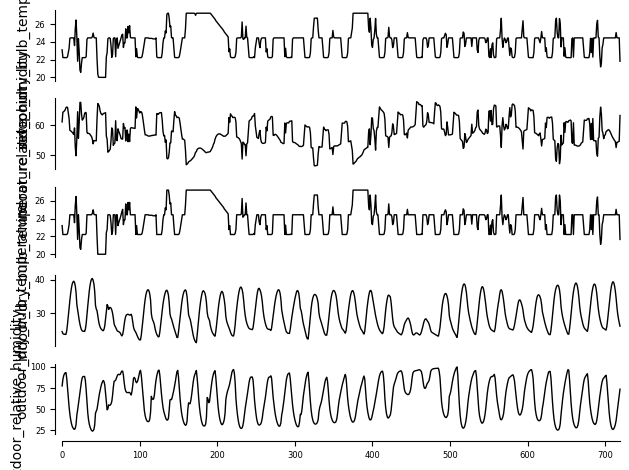

In [7]:
#rendo i dati in formato numpy e creo il dataframe tigramite e mostro il grafico delle time_series
data_array = electricity_data.values
    
dataframe = pp.DataFrame(data=data_array, var_names=list(electricity_data.columns))
tp.plot_timeseries(dataframe); plt.show()

Di seguito c'è la parte di codice relativa all'analisi usando gpdc e cmiknn

In [8]:
#Specifica del test di indipendenza
gpdc = GPDC(significance='analytic', gp_params=None)

#esecuzione PCMCI
pcmci_gpdc = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=gpdc,
    verbosity=0)

#definisco i lag da considerare
results = pcmci_gpdc.run_pcmci(tau_max=2, pc_alpha=0.1, alpha_level = 0.01)

#non da risultati, o meglio, continua ad elaborare ma supera i 10 minuti e mostra ogni tanto il warning
#ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value. warnings.warn(





c:\Users\Simone\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Simone\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Simone\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn

KeyboardInterrupt: 

In [9]:
#ho semplicemente copiato il codice del tutorial e sembra funzionare

cmi_knn = CMIknn(significance='fixed_thres', model_selection_folds=3)
pcmci_cmi_knn = PCMCI(dataframe=dataframe, cond_ind_test=cmi_knn, verbosity=0)
results = pcmci_cmi_knn.run_pcmciplus(tau_max=2, pc_alpha=0.05) 

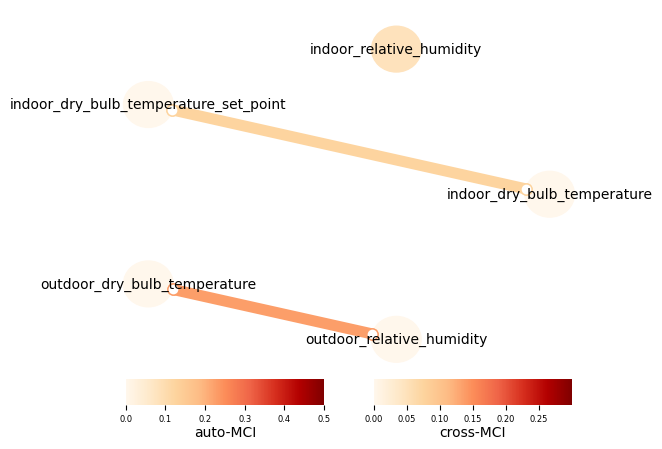

In [10]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=columns_of_interest,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=0.,
    vmax_edges = 0.3,
    edge_ticks=0.05,
    cmap_edges='OrRd',
    vmin_nodes=0,
    vmax_nodes=.5,
    node_ticks=.1,
    cmap_nodes='OrRd',
    ); plt.show()